In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model


In [3]:
%matplotlib inline

In [7]:
df =pd.read_excel('zephyr.xlsx')

In [8]:
df.head()


,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,12/03/13,0.00,83,2750000,2500000,90.909091,1,0,8
1,1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,06/16/15,400.00,0,799000,850000,106.382979,0,1,8
2,134 Alhambra St,Marina,3,3.0,1,0,NaN,01/19/16,0.00,56,3195000,3075000,96.244131,1,0,7
3,1340 Clay St #802,Nob Hill,3,3.0,2,0,NaN,09/29/15,2990.63,4,2495000,3000000,120.240481,0,1,8
4,1342 Green St #4,Russian Hill,1,1.0,1,0,NaN,06/03/14,200.00,31,739000,750000,101.488498,0,1,8


In [9]:
df.count()


address               4342
district              4342
bedroom               4342
bath                  4342
parking               4342
sqft                  4342
dollar_sqft           3792
sold                  4342
home_own_ass          4342
day_on_market         4342
list_price            4342
sale_price            4342
sale_to_list_ratio    4342
single_f_h            4342
condo                 4342
dist_no               4342
dtype: int64

In [10]:
df.describe()


,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
count,4342.000000,4342.000000,4342.000000,4342.000000,3792.000000,4342.000000,4342.000000,4.342000e+03,4.342000e+03,4342.000000,4342.000000,4342.000000,4342.000000
mean,2.337402,1.891237,1.231690,1290.814371,894.296805,398.018699,37.094657,2.558661e+06,1.474873e+06,129.296073,0.421004,0.578996,8.492400
std,1.203801,1.015538,0.710749,1074.240761,384.506953,740.193016,42.660902,2.790305e+07,1.665789e+06,1516.038849,0.493777,0.493777,1.245979
min,0.000000,1.000000,0.000000,0.000000,125.000000,0.000000,0.000000,3.000000e+03,1.399000e+05,0.097774,0.000000,0.000000,7.000000
25%,2.000000,1.000000,1.000000,764.000000,600.000000,0.000000,13.000000,6.488500e+05,6.900000e+05,100.000000,0.000000,0.000000,7.000000
50%,2.000000,2.000000,1.000000,1150.000000,858.211880,278.325000,25.000000,8.490000e+05,9.010000e+05,104.825667,0.000000,1.000000,8.000000
75%,3.000000,2.000000,2.000000,1613.000000,1108.550427,584.460000,47.000000,1.475000e+06,1.500000e+06,113.458013,1.000000,1.000000,10.000000
max,14.000000,11.000000,7.000000,20516.000000,4228.571429,31356.770000,609.000000,7.950000e+08,3.100000e+07,100000.000000,1.000000,1.000000,10.000000


In [11]:
df.columns


Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')

In [12]:
print df.columns

Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')


In [14]:
type(df.sold[0])

unicode

In [16]:
type(df.parking[0])

numpy.int64

In [31]:
sold_dt = pd.to_datetime(df.sold, infer_datetime_format=True)

In [32]:
sold_dt.head()


0   2013-12-03
1   2015-06-16
2   2016-01-19
3   2015-09-29
4   2014-06-03
Name: sold, dtype: datetime64[ns]

In [33]:
type(sold_dt[0])

pandas.tslib.Timestamp

In [35]:
sold_dt[0]


Timestamp('2013-12-03 00:00:00')

In [38]:
sold_dt[0].year


2013

In [44]:
sold_dt.count()

4342

In [45]:
df.sold = sold_dt

In [46]:
df.head()

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,2013-12-03,0.00,83,2750000,2500000,90.909091,1,0,8
1,1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,2015-06-16,400.00,0,799000,850000,106.382979,0,1,8
2,134 Alhambra St,Marina,3,3.0,1,0,NaN,2016-01-19,0.00,56,3195000,3075000,96.244131,1,0,7
3,1340 Clay St #802,Nob Hill,3,3.0,2,0,NaN,2015-09-29,2990.63,4,2495000,3000000,120.240481,0,1,8
4,1342 Green St #4,Russian Hill,1,1.0,1,0,NaN,2014-06-03,200.00,31,739000,750000,101.488498,0,1,8


In [48]:
type(df.sold[0])

pandas.tslib.Timestamp

In [49]:
df.columns


Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')

In [50]:
model = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + sold + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no', data=df)
linreg = model.fit()
print linreg.summary()

NameError: name 'smf' is not defined

In [51]:
import statsmodels.formula.api as smf

In [52]:
model = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + sold + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no', data=df)

In [53]:
linreg = model.fit()
print linreg.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     13.74
Date:                Wed, 16 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:30:21   Log-Likelihood:                -65285.
No. Observations:                4342   AIC:                         1.322e+05
Df Residuals:                    3536   BIC:                         1.373e+05
Df Model:                         805                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

In [54]:
model_nodate = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no', data=df)
linreg2 = model_nodate.fit()
print linreg2.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     339.6
Date:                Wed, 16 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:35:28   Log-Likelihood:                -65680.
No. Observations:                4342   AIC:                         1.314e+05
Df Residuals:                    4310   BIC:                         1.316e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

In [55]:
df.sort_values?


In [60]:
df.sort_values('sold')

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
1032,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,2013-11-12,556.00,8,500000,595000,119.000000,0,1,8
958,930 Pine #211,Downtown,1,1.0,1,700,871.428571,2013-11-12,511.14,35,599000,610000,101.836394,0,1,8
2956,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,2013-11-12,565.00,38,1195000,1130000,94.560669,0,1,8
2255,950 Stockton St #201,Financial District/B,0,2.0,0,1185,430.379747,2013-11-13,500.00,52,448000,510000,113.839286,0,1,8
1647,779 Sweeny St,Portola,3,1.0,1,990,647.979798,2013-11-13,0.00,31,559000,641500,114.758497,1,0,10
1723,2055 Thomas Ave,Silver Terrace,3,2.0,1,1010,544.554455,2013-11-13,0.00,43,539000,550000,102.040816,1,0,10
518,873 Meade Ave,Bayview Heights,3,2.0,1,0,NaN,2013-11-13,150.00,41,479000,477000,99.582463,0,1,10
381,3417 Divisadero St,Marina,2,1.5,1,0,NaN,2013-11-13,0.00,85,1299888,1245075,95.783252,0,1,7
2478,2821 Buchanan St #2,Pacific Heights,2,1.0,1,1250,1064.000000,2013-11-13,256.00,25,1300000,1330000,102.307692,0,1,7
313,2921 Jackson St,Pacific Heights,5,4.0,2,0,NaN,2013-11-13,0.00,7,3695000,3850000,104.194858,1,0,7


In [61]:
plt.scatter(df.sort_values('sold'), df.sale_price)
plt.show()

ValueError: x and y must be the same size

In [64]:
df.sort_values('sold').sold.head()


1032   2013-11-12
958    2013-11-12
2956   2013-11-12
2255   2013-11-13
1647   2013-11-13
Name: sold, dtype: datetime64[ns]

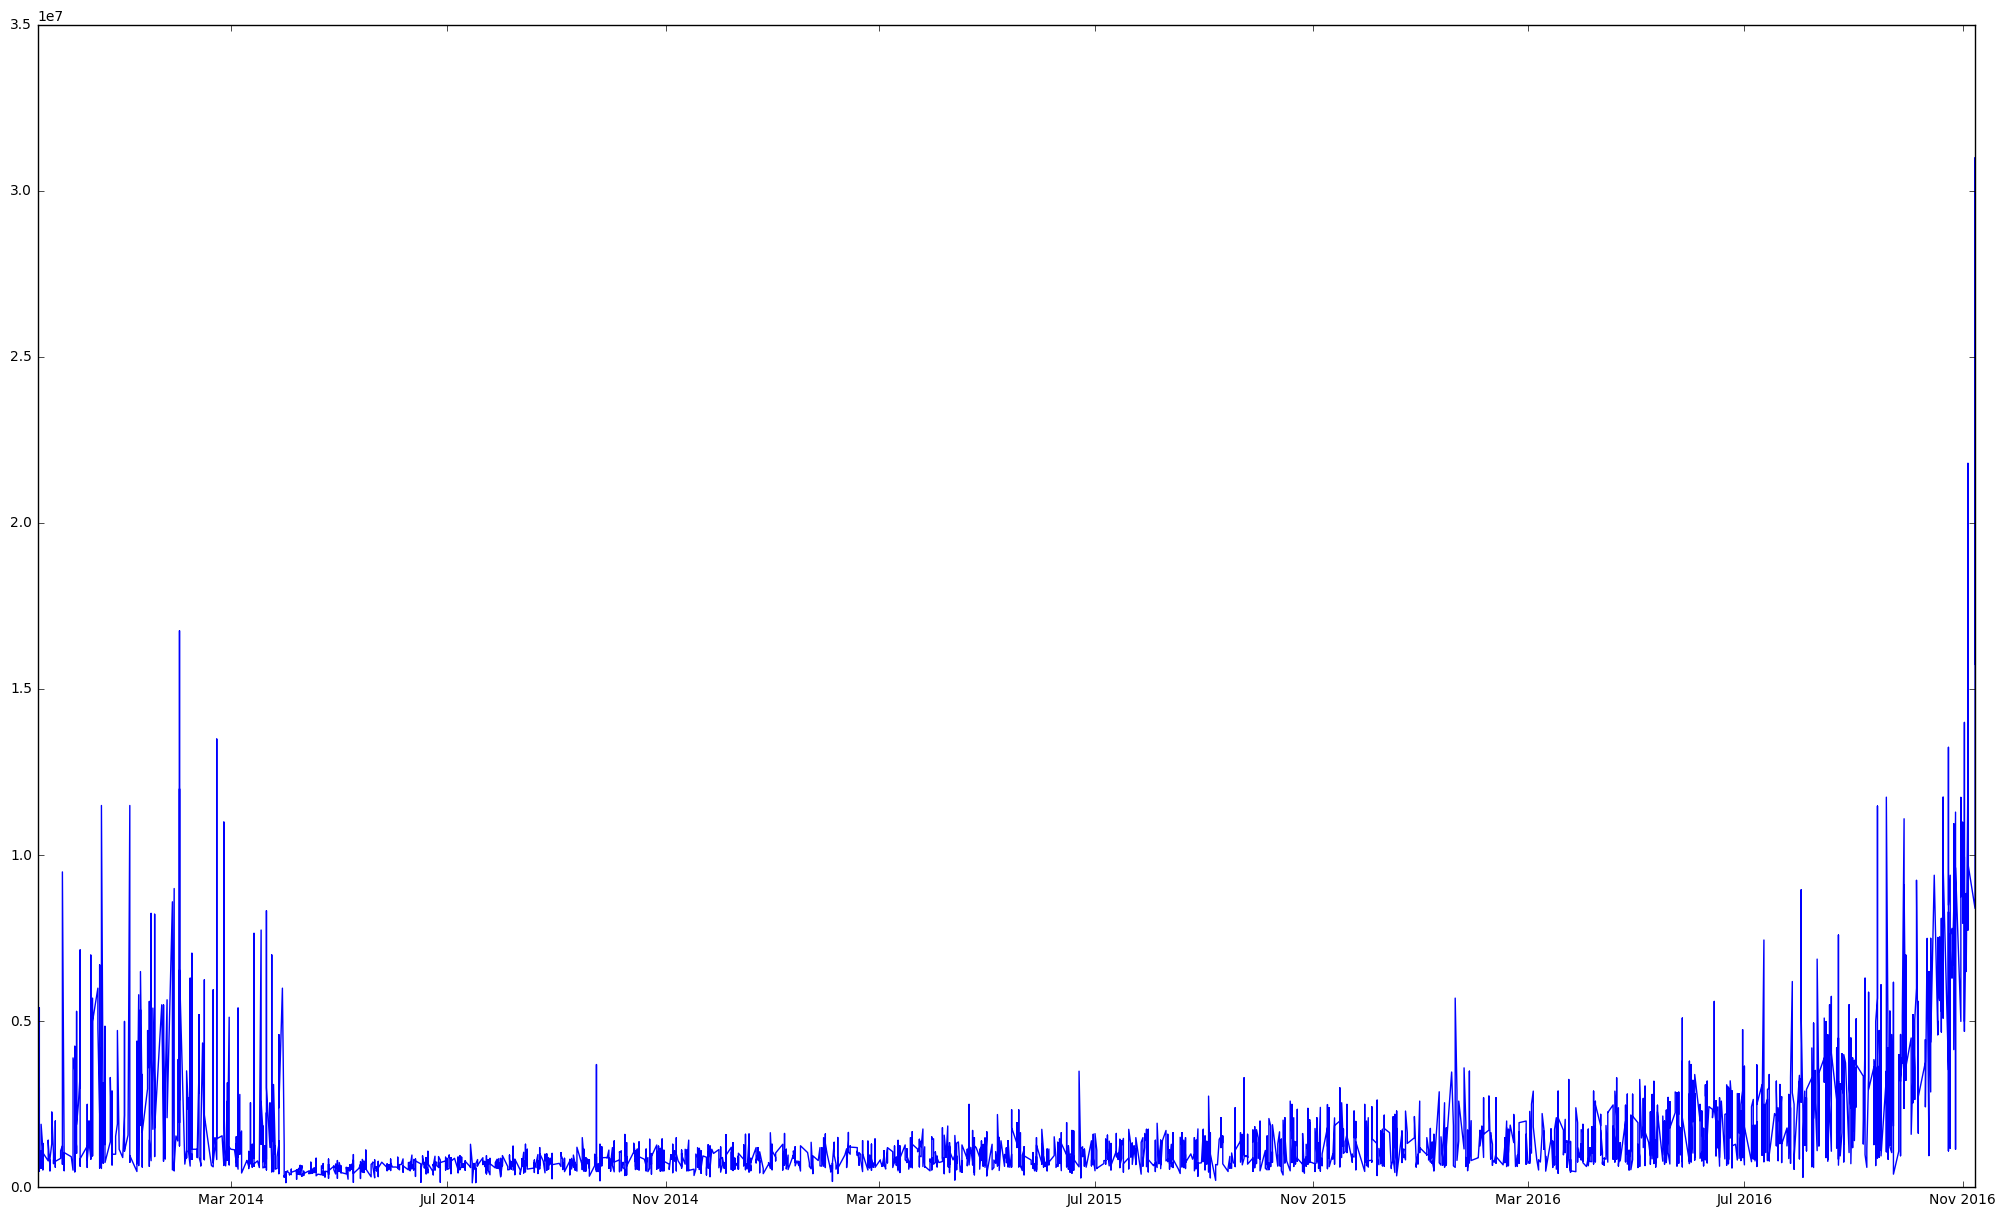

In [71]:
plt.figure(figsize=(25,15))
plt.plot(df.sort_values(['sold', 'list_price']).sold, df.sale_price)
plt.show()

In [72]:
df.sort_values('sold').head(100)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
1032,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,2013-11-12,556.00,8,500000,595000,119.000000,0,1,8
958,930 Pine #211,Downtown,1,1.0,1,700,871.428571,2013-11-12,511.14,35,599000,610000,101.836394,0,1,8
2956,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,2013-11-12,565.00,38,1195000,1130000,94.560669,0,1,8
2255,950 Stockton St #201,Financial District/B,0,2.0,0,1185,430.379747,2013-11-13,500.00,52,448000,510000,113.839286,0,1,8
1647,779 Sweeny St,Portola,3,1.0,1,990,647.979798,2013-11-13,0.00,31,559000,641500,114.758497,1,0,10
1723,2055 Thomas Ave,Silver Terrace,3,2.0,1,1010,544.554455,2013-11-13,0.00,43,539000,550000,102.040816,1,0,10
518,873 Meade Ave,Bayview Heights,3,2.0,1,0,NaN,2013-11-13,150.00,41,479000,477000,99.582463,0,1,10
381,3417 Divisadero St,Marina,2,1.5,1,0,NaN,2013-11-13,0.00,85,1299888,1245075,95.783252,0,1,7
2478,2821 Buchanan St #2,Pacific Heights,2,1.0,1,1250,1064.000000,2013-11-13,256.00,25,1300000,1330000,102.307692,0,1,7
313,2921 Jackson St,Pacific Heights,5,4.0,2,0,NaN,2013-11-13,0.00,7,3695000,3850000,104.194858,1,0,7


In [81]:
df.sold[0].year


2013

In [85]:
for i in range(100):
    print df.sort_values('sold.year').sold[i].year
    

KeyError: 'sold.year'

In [87]:
df.sort_values('sold').sale_price.head(20)

1032     595000
958      610000
2956    1130000
2255     510000
1647     641500
1723     550000
518      477000
381     1245075
2478    1330000
313     3850000
1526     638625
787      665000
3330    1200000
800      625000
249     1866000
297     3800000
866      460000
1447    1087000
1819     640500
1332     860000
Name: sale_price, dtype: int64

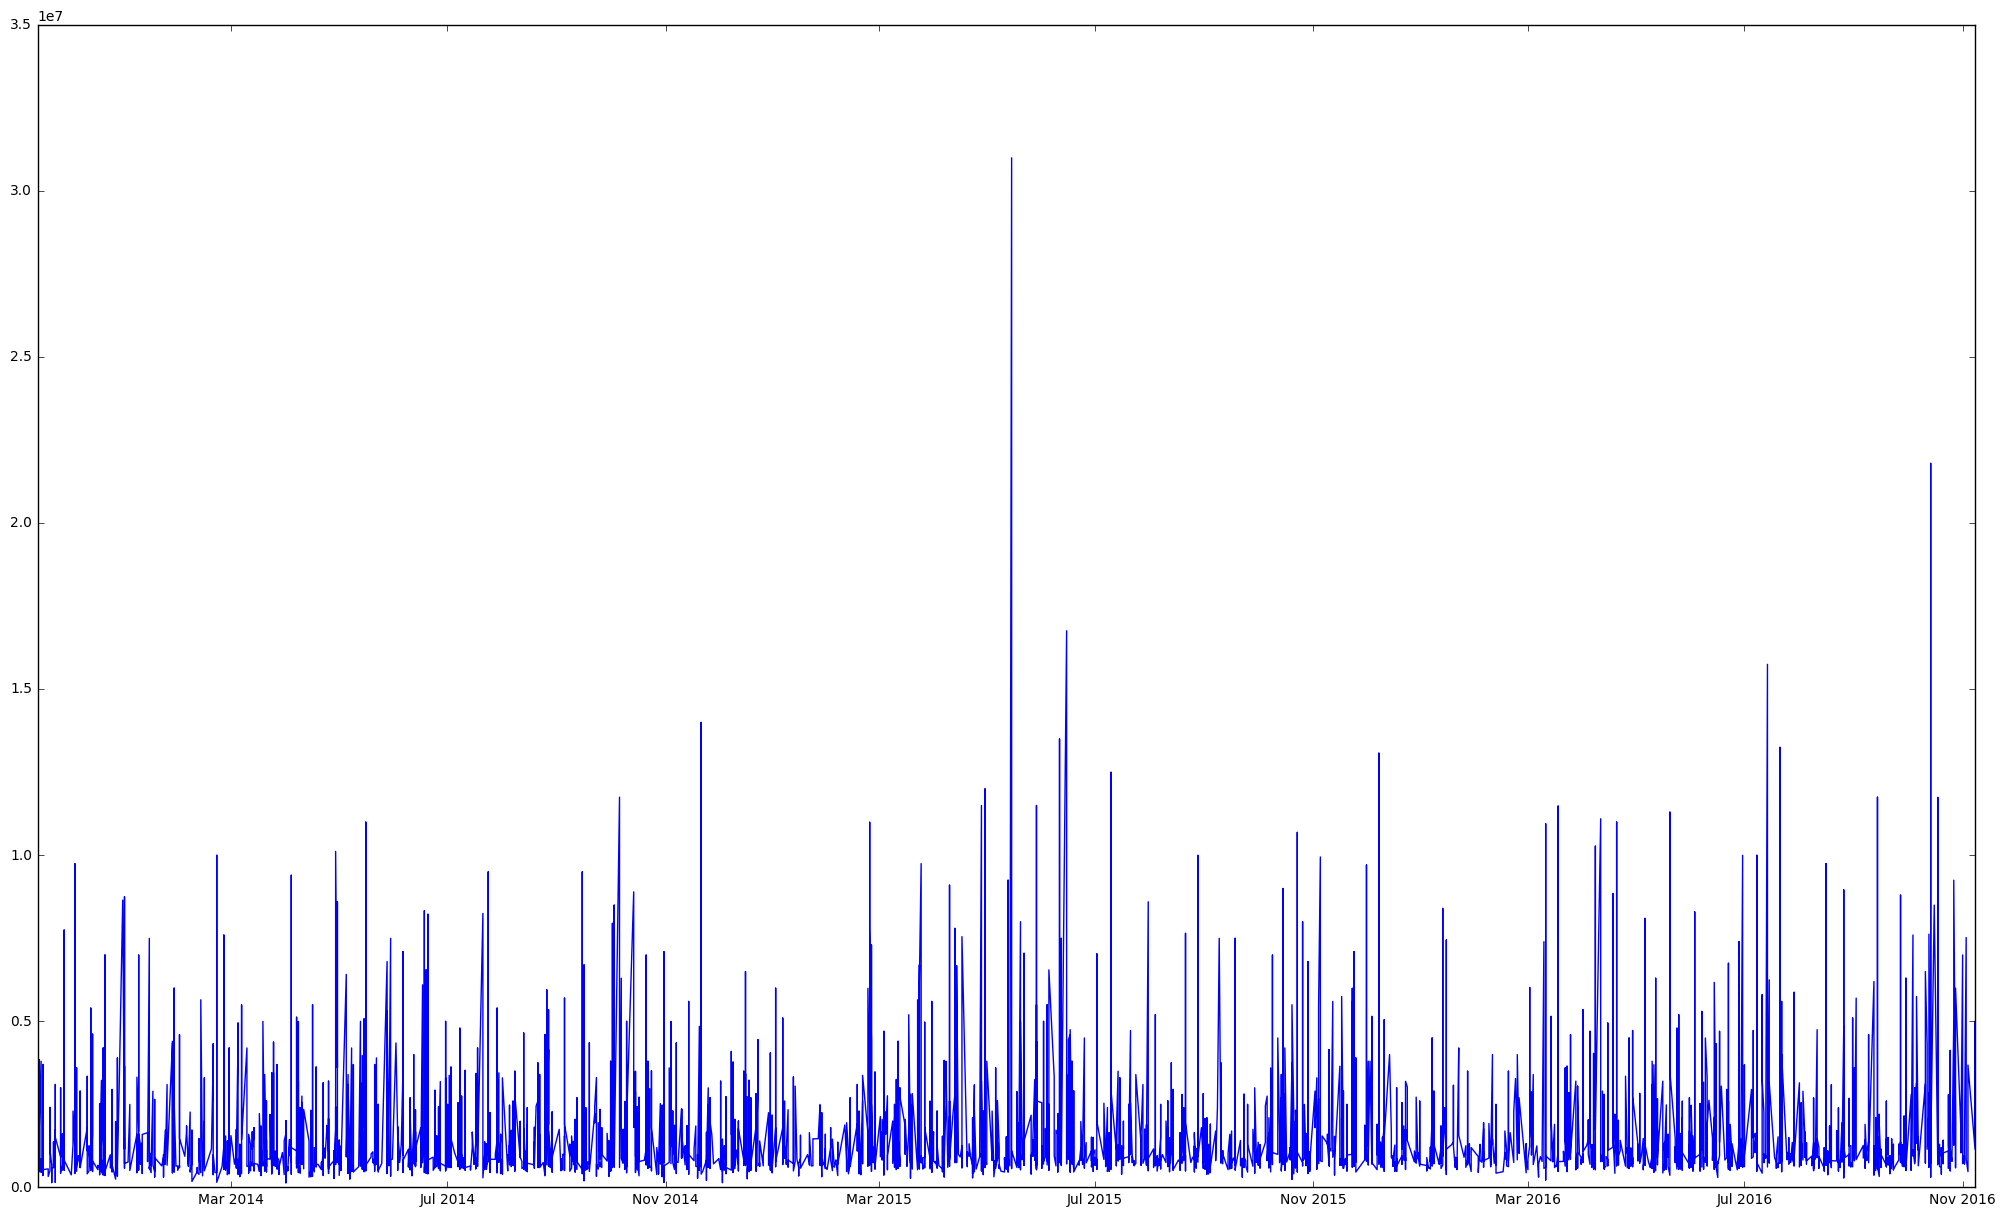

In [88]:
plt.figure(figsize=(25,15))
plt.plot(df.sort_values('sold').sold, df.sort_values('sold').sale_price)
plt.show()